In [1]:
import numpy as np
import nibabel as nib
from nibabel.affines import apply_affine
import os



In [2]:
# Get all surface files and sort them
surf_dir = 'raw_data/FreeSurfer_Surfaces/40_depths'
surf_files = sorted([f for f in os.listdir(surf_dir) if f.startswith('rh.equi')])

print(f"{len(surf_files)} surface files")
depths = len(surf_files)

# array to store every vertex coordinate
all_vertex_coords = []
# array of tuples to store each vertex unique identifier (vertex_id, depth)
all_vertex_labels = []

for depth_idx, surf_filename in enumerate(surf_files):
    surf_file = os.path.join(surf_dir, surf_filename)
    
    print(f"Depth {depth_idx}: {surf_filename}")
    
    coords, faces, volume_info = nib.freesurfer.read_geometry(surf_file, read_metadata=True)
    cras = np.array(volume_info['cras'])
    scanner_ras = coords + cras
    
    all_vertex_coords.append(scanner_ras)
    
    labels = [(v_id, depth_idx) for v_id in range(len(coords))]
    all_vertex_labels.extend(labels)

all_vertex_coords = np.vstack(all_vertex_coords)

print(f"\nTotal vertices: {len(all_vertex_coords):,}")
print(f"Shape: {all_vertex_coords.shape}")
print(f"length of all_vertex_labels: {len(all_vertex_labels)}")

41 surface files
Depth 0: rh.equi400.0.pial
Depth 1: rh.equi400.025.pial
Depth 2: rh.equi400.05.pial
Depth 3: rh.equi400.075.pial
Depth 4: rh.equi400.1.pial
Depth 5: rh.equi400.125.pial
Depth 6: rh.equi400.15.pial
Depth 7: rh.equi400.175.pial
Depth 8: rh.equi400.2.pial
Depth 9: rh.equi400.225.pial
Depth 10: rh.equi400.25.pial
Depth 11: rh.equi400.275.pial
Depth 12: rh.equi400.3.pial
Depth 13: rh.equi400.325.pial
Depth 14: rh.equi400.35.pial
Depth 15: rh.equi400.375.pial
Depth 16: rh.equi400.4.pial
Depth 17: rh.equi400.425.pial
Depth 18: rh.equi400.45.pial
Depth 19: rh.equi400.475.pial
Depth 20: rh.equi400.5.pial
Depth 21: rh.equi400.525.pial
Depth 22: rh.equi400.55.pial
Depth 23: rh.equi400.575.pial
Depth 24: rh.equi400.6.pial
Depth 25: rh.equi400.625.pial
Depth 26: rh.equi400.65.pial
Depth 27: rh.equi400.675.pial
Depth 28: rh.equi400.7.pial
Depth 29: rh.equi400.725.pial
Depth 30: rh.equi400.75.pial
Depth 31: rh.equi400.775.pial
Depth 32: rh.equi400.8.pial
Depth 33: rh.equi400.825.pial

In [3]:
if True: 
    test_file = os.path.join(surf_dir, surf_files[10])
    coords, __  = nib.freesurfer.read_geometry(test_file)
    print(type(coords))
    print(coords.shape)
    print(len(coords))
    print(coords[0])
    print("\n")
    print(coords[:5])

if False:
    print(type(all_vertex_coords))        # numpy.ndarray
    print(all_vertex_coords.shape)        # (5235909, 3)
    print(all_vertex_coords[0])           # First vertex coords: [x, y, z]

    print(type(all_vertex_labels))        # list
    print(len(all_vertex_labels))         # 5235909
    print(all_vertex_labels[0])           # (0, 0)

    # See first 10 of each:
    print(all_vertex_coords[:10])
    print(all_vertex_labels[:10])

    # Verify alignment:
    for i in range(5):
        coord = all_vertex_coords[i]
        label = all_vertex_labels[i]
        print(f"Row {i}: coords={coord}, label={label}")

<class 'numpy.ndarray'>
(249329, 3)
249329
[ 1.07147264e+01 -7.91223373e+01  4.24270257e-02]


[[ 1.07147264e+01 -7.91223373e+01  4.24270257e-02]
 [ 1.04482479e+01 -7.91357956e+01  6.18889034e-01]
 [ 1.13176994e+01 -7.95562134e+01  4.93760347e-01]
 [ 1.13204908e+01 -7.95085983e+01 -9.04745832e-02]
 [ 1.04807720e+01 -7.94347534e+01  1.36554921e+00]]


In [16]:
if False:

    surf_paths = 'raw_data/freesurfer_surfaces/20_depths/rh.equi{depth:.2f}.pial'

    # Storage for all vertices
    all_vertex_coords = []  # Scanner RAS coordinates
    all_vertex_labels = []  # (vertex_id, depth_idx) tuples

    print("Loading surfaces and converting to Scanner RAS...")

    for depth_idx, depth in enumerate(depths):
        surf_file = surf_paths.format(depth=depth)

        print(f"Depth {depth_idx}: loading {surf_file}")
        
        # Load surface
        coords, faces, volume_info = nib.freesurfer.read_geometry(surf_file, read_metadata=True)
        cras = np.array(volume_info['cras'])
        
        # Convert to Scanner RAS with cras offset
        scanner_ras = coords + cras
        
        # Store coordinates
        all_vertex_coords.append(scanner_ras)
        
        # Store labels: (original_vertex_id, depth_idx)
        labels = [(v_id, depth_idx) for v_id in range(len(coords))]
        all_vertex_labels.extend(labels)
        
        print(f"Depth {depth_idx} ({depth:.2f}): {len(coords)} vertices")

    # Concatenate all coordinates
    all_vertex_coords = np.vstack(all_vertex_coords)
    print(f"\nTotal vertices across all depths: {len(all_vertex_coords):,}")
    print(f"Shape: {all_vertex_coords.shape}")
    print(f"length of all_vertex_labels: {len(all_vertex_labels)}")

In [ ]:
if False:

    # Load volume
    volume = nib.load('raw_data/RHoccip_SGcrop.nii.gz')
    print(f"Volume shape: {volume.shape}")
    print(f"Total voxels: {np.prod(volume.shape):,}")

    # loops sloer
    voxel_coords = []
    voxel_ras = []
    intensities = []

    volume_data = volume.get_fdata()

    for i in range(volume.shape[0]):
        for j in range(volume.shape[1]):
            for k in range(volume.shape[2]):
                # Get voxel coordinate
                voxel_coords.append([i, j, k])
                
                # Transform to RAS
                ras = apply_affine(volume.affine, [[i, j, k]])[0]
                voxel_ras.append(ras)
                
                # Get intensity
                intensities.append(volume_data[i, j, k])

    voxel_coords = np.array(voxel_coords)
    voxel_ras = np.array(voxel_ras)
    intensities = np.array(intensities)


In [3]:
# Load volume
volume = nib.load('raw_data/RHoccip_SGcrop.nii.gz')
print(f"Volume shape: {volume.shape}")
print(f"Total voxels: {np.prod(volume.shape):,}")

# Create grid of all voxel indices

i, j, k = np.meshgrid(
    np.arange(volume.shape[0]),
    np.arange(volume.shape[1]),
    np.arange(volume.shape[2]),
    indexing='ij'
)

voxel_indices = np.column_stack([i.reshape(-1), j.reshape(-1), k.reshape(-1)])
print(f"Voxel indices shape: {voxel_indices.shape}")

# Transform to Scanner RAS using volume's affine
voxel_ras = apply_affine(volume.affine, voxel_indices)
print(f"Voxel RAS coordinates shape: {voxel_ras.shape}")

# Get intensities
intensities = volume.get_fdata().reshape(-1)
print(f"Intensities shape: {intensities.shape}")

Volume shape: (182, 274, 305)
Total voxels: 15,209,740
Voxel indices shape: (15209740, 3)
Voxel RAS coordinates shape: (15209740, 3)
Intensities shape: (15209740,)


In [4]:
from scipy.spatial import cKDTree

vertex_tree = cKDTree(all_vertex_coords)

print(f"Tree contains {vertex_tree.n} points")

Tree contains 10222489 points


In [5]:

print(f"No. of voxels to query: {len(voxel_ras)}")

# Find nearest vertex for each voxel
distances, nearest_vertex_global_idx = vertex_tree.query(voxel_ras, k=1)

print(f"nearest_vertex_global_idx shape: {nearest_vertex_global_idx.shape}")

No. of voxels to query: 15209740
nearest_vertex_global_idx shape: (15209740,)


In [6]:
from collections import defaultdict

# Group voxels by their nearest vertex
vertex_to_voxels = defaultdict(list)

for voxel_idx in range(len(nearest_vertex_global_idx)):
    vertex_global_idx = nearest_vertex_global_idx[voxel_idx]
    intensity = intensities[voxel_idx]
    
    # Use the vertex global index directly as key
    vertex_to_voxels[vertex_global_idx].append(intensity)

# Calculate statistics
vertex_stats = {}
for vertex_idx, intensity_list in vertex_to_voxels.items():
    vertex_stats[vertex_idx] = {
        'mean': np.mean(intensity_list),
        'median': np.median(intensity_list),
        'count': len(intensity_list),
        'intensities': intensity_list
    }

print(f"Vertices with assigned voxels: {len(vertex_stats)}")
# Show first 5 entries
for i, (vertex_idx, stats) in enumerate(vertex_stats.items()):
    if i >= 5:
        break
    print(f"\nVertex {vertex_idx}:")
    print(f"  Mean: {stats['mean']:.2f}")
    print(f"  Median: {stats['median']:.2f}")
    print(f"  Count: {stats['count']}")
    print(f"  Intensities: {stats['intensities'][:3]}...")  # First 3 values

Vertices with assigned voxels: 418232

Vertex 1630:
  Mean: 699.60
  Median: 355.00
  Count: 188
  Intensities: [np.float64(108.0), np.float64(697.0), np.float64(182.0)]...

Vertex 1880:
  Mean: 1563.78
  Median: 1003.50
  Count: 76
  Intensities: [np.float64(472.0), np.float64(117.0), np.float64(528.0)]...

Vertex 500538:
  Mean: 3579.57
  Median: 3561.50
  Count: 14
  Intensities: [np.float64(3183.0), np.float64(3359.0), np.float64(3453.0)]...

Vertex 999196:
  Mean: 3521.65
  Median: 3473.00
  Count: 17
  Intensities: [np.float64(3219.0), np.float64(3762.0), np.float64(3473.0)]...

Vertex 1497854:
  Mean: 3261.11
  Median: 3238.50
  Count: 18
  Intensities: [np.float64(3089.0), np.float64(3233.0), np.float64(2914.0)]...


In [7]:
# Convert labels to integers for faster grouping
n_vertices_per_depth = len(coords)  #  surface has 249329 vertices

# Compute unique ID: depth_idx * n_vertices_per_depth + vertex_id
vertex_labels_array = np.array(all_vertex_labels)  # (N_total_vertices, 2)
unique_vertex_ids = (
    vertex_labels_array[:, 1] * n_vertices_per_depth + 
    vertex_labels_array[:, 0]
)

# Map each voxel to its vertex's unique ID
voxel_vertex_unique_ids = unique_vertex_ids[nearest_vertex_global_idx]

# Create DataFrame
import pandas as pd

df = pd.DataFrame({
    'vertex_unique_id': voxel_vertex_unique_ids,
    'intensity': intensities
})

# Group by vertex and aggregate BOTH stats AND raw values
vertex_stats = df.groupby('vertex_unique_id')['intensity'].agg([
    'mean', 
    'median', 
    'count',
    ('intensities', list)  # Keep all raw intensities
])

print(f"Vertices with assigned voxels: {len(vertex_stats)}")
print(f"\nSample stats:")
print(vertex_stats.head())

Vertices with assigned voxels: 418232

Sample stats:
                         mean  median  count  \
vertex_unique_id                               
525               3499.750000  3411.5      4   
540               4267.000000  4267.0      1   
584                552.500000   552.5      2   
585                910.583333   565.0     12   
598               1024.600000  1125.5     10   

                                                        intensities  
vertex_unique_id                                                     
525                                [3118.0, 3102.0, 3705.0, 4074.0]  
540                                                        [4267.0]  
584                                                  [444.0, 661.0]  
585               [833.0, 504.0, 566.0, 193.0, 383.0, 169.0, 838...  
598               [1640.0, 1377.0, 801.0, 67.0, 1528.0, 1496.0, ...  


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ===== PREPARE DATA =====

# Extract profiles from vertex_stats
# We'll create arrays aligned by vertex index

# Get all unique vertices that have data
vertices_with_data = sorted(vertex_stats.keys())
n_vertices = len(vertices_with_data)

# Determine number of depths (assuming all vertices have same depths)
# Decode first vertex to check
first_vertex_unique_id = vertices_with_data[0]
n_vertices_per_depth = 249329
first_depth = first_vertex_unique_id // n_vertices_per_depth

# Count how many depths we have by checking unique depth values
all_depths = set()
for unique_id in vertices_with_data:
    depth = unique_id // n_vertices_per_depth
    all_depths.add(depth)
n_depths = len(all_depths)

print(f"Total vertices with data: {n_vertices}")
print(f"Number of depths: {n_depths}")

# ===== BUILD PROFILE MATRIX =====
# We need to organize data as: profiles[vertex_id][depth] = intensity

# First, figure out which actual vertex IDs we have
vertex_id_to_row = {}  # Maps actual vertex_id → row in our matrix
unique_vertex_ids_only = set()

for unique_id in vertices_with_data:
    depth = unique_id // n_vertices_per_depth
    vertex_id = unique_id % n_vertices_per_depth
    unique_vertex_ids_only.add(vertex_id)

unique_vertex_ids_sorted = sorted(unique_vertex_ids_only)
n_unique_vertices = len(unique_vertex_ids_sorted)

# Create mapping
for row_idx, vertex_id in enumerate(unique_vertex_ids_sorted):
    vertex_id_to_row[vertex_id] = row_idx

print(f"Unique vertex IDs: {n_unique_vertices}")

# Initialize arrays for profiles (NaN for missing data)
median_profiles = np.full((n_unique_vertices, n_depths), np.nan)
mean_profiles = np.full((n_unique_vertices, n_depths), np.nan)
min_profiles = np.full((n_unique_vertices, n_depths), np.nan)
max_profiles = np.full((n_unique_vertices, n_depths), np.nan)
counts = np.zeros((n_unique_vertices, n_depths), dtype=int)

# Fill in the data
for unique_id, stats in vertex_stats.items():
    depth = unique_id // n_vertices_per_depth
    vertex_id = unique_id % n_vertices_per_depth
    row = vertex_id_to_row[vertex_id]
    
    median_profiles[row, depth] = stats['median']
    mean_profiles[row, depth] = stats['mean']
    counts[row, depth] = stats['count']
    
    # Calculate min/max from raw intensities
    intensities = stats['intensities']
    min_profiles[row, depth] = np.min(intensities)
    max_profiles[row, depth] = np.max(intensities)

print(f"\nProfile matrix shape: {median_profiles.shape}")
print(f"Missing data points: {np.isnan(median_profiles).sum()}")

# ===== PLOTTING FUNCTIONS =====

def plot_single_profile(vertex_row_idx, depth_start=0, depth_end=None, use_median=True):
    """
    Plot a single vertex's intensity profile across depths
    """
    if depth_end is None:
        depth_end = n_depths
    
    # Select which profile to use
    if use_median:
        profile = median_profiles[vertex_row_idx, depth_start:depth_end]
        profile_type = "Median"
    else:
        profile = mean_profiles[vertex_row_idx, depth_start:depth_end]
        profile_type = "Mean"
    
    min_vals = min_profiles[vertex_row_idx, depth_start:depth_end]
    max_vals = max_profiles[vertex_row_idx, depth_start:depth_end]
    
    # Depths to plot (normalized 0-1)
    depths_range = np.arange(depth_start, depth_end)
    depths_normalized = depths_range / (n_depths - 1)
    
    # Handle missing data (NaN values will create gaps in line)
    valid_mask = ~np.isnan(profile)
    
    plt.figure(figsize=(12, 6))
    
    # Plot range (fill between min/max)
    plt.fill_between(
        depths_normalized[valid_mask], 
        min_vals[valid_mask], 
        max_vals[valid_mask],
        alpha=0.3, 
        color='lightblue',
        label='Min-Max range'
    )
    
    # Plot main profile
    plt.plot(
        depths_normalized[valid_mask], 
        profile[valid_mask],
        marker='o',
        linewidth=2,
        markersize=4,
        color='darkblue',
        label=f'{profile_type} intensity'
    )
    
    # Mark missing data points
    missing_mask = np.isnan(profile)
    if missing_mask.any():
        plt.scatter(
            depths_normalized[missing_mask],
            np.zeros(missing_mask.sum()),
            marker='x',
            s=100,
            color='red',
            label='Missing data',
            zorder=5
        )
    
    vertex_id = unique_vertex_ids_sorted[vertex_row_idx]
    plt.xlabel('Normalized Cortical Depth (0 = pial, 1 = WM)', fontsize=11)
    plt.ylabel('Intensity (T2*)', fontsize=11)
    plt.title(f'Vertex {vertex_id} - {profile_type} Intensity Profile\n'
              f'Depths {depth_start} to {depth_end-1}', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_batch_profiles(start_idx, n_profiles=10, depth_start=0, depth_end=None, use_median=True):
    """
    Plot multiple profiles on same axes (no fill_between to avoid clutter)
    """
    if depth_end is None:
        depth_end = n_depths
    
    end_idx = min(start_idx + n_profiles, n_unique_vertices)
    
    # Select profile type
    if use_median:
        profiles = median_profiles
        profile_type = "Median"
    else:
        profiles = mean_profiles
        profile_type = "Mean"
    
    # Depths to plot
    depths_range = np.arange(depth_start, depth_end)
    depths_normalized = depths_range / (n_depths - 1)
    
    plt.figure(figsize=(14, 8))
    
    # Plot each profile
    for row_idx in range(start_idx, end_idx):
        profile = profiles[row_idx, depth_start:depth_end]
        valid_mask = ~np.isnan(profile)
        
        # Only plot if there's some valid data
        if valid_mask.any():
            vertex_id = unique_vertex_ids_sorted[row_idx]
            plt.plot(
                depths_normalized[valid_mask],
                profile[valid_mask],
                alpha=0.7,
                linewidth=1.5,
                label=f'Vertex {vertex_id}'
            )
    
    plt.xlabel('Normalized Cortical Depth (0 = pial, 1 = WM)', fontsize=11)
    plt.ylabel('Intensity (T2*)', fontsize=11)
    plt.title(f'{profile_type} Intensity Profiles - Vertices {start_idx} to {end_idx-1}\n'
              f'Depths {depth_start} to {depth_end-1}', fontsize=12)
    
    # Only show legend if not too many profiles
    if n_profiles <= 15:
        plt.legend(fontsize=8, loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# ===== INTERACTIVE WIDGETS =====

# Widget for SINGLE profile viewer
def single_profile_widget():
    widgets.interact(
        plot_single_profile,
        vertex_row_idx=widgets.IntSlider(
            value=0,
            min=0,
            max=n_unique_vertices - 1,
            step=1,
            description='Vertex:',
            continuous_update=False
        ),
        depth_start=widgets.IntSlider(
            value=2,
            min=0,
            max=n_depths - 3,
            step=1,
            description='Start depth:',
            continuous_update=False
        ),
        depth_end=widgets.IntSlider(
            value=n_depths - 2,
            min=3,
            max=n_depths,
            step=1,
            description='End depth:',
            continuous_update=False
        ),
        use_median=widgets.Checkbox(
            value=True,
            description='Use median (vs mean)'
        )
    )

# Widget for BATCH profile viewer
def batch_profile_widget():
    widgets.interact(
        plot_batch_profiles,
        start_idx=widgets.IntSlider(
            value=0,
            min=0,
            max=max(0, n_unique_vertices - 10),
            step=10,
            description='Start vertex:',
            continuous_update=False
        ),
        n_profiles=widgets.IntSlider(
            value=10,
            min=1,
            max=50,
            step=1,
            description='# profiles:',
            continuous_update=False
        ),
        depth_start=widgets.IntSlider(
            value=2,
            min=0,
            max=n_depths - 3,
            step=1,
            description='Start depth:',
            continuous_update=False
        ),
        depth_end=widgets.IntSlider(
            value=n_depths - 2,
            min=3,
            max=n_depths,
            step=1,
            description='End depth:',
            continuous_update=False
        ),
        use_median=widgets.Checkbox(
            value=True,
            description='Use median (vs mean)'
        )
    )

# ===== DISPLAY =====

print("\n" + "="*60)
print("SINGLE PROFILE VIEWER")
print("="*60)
single_profile_widget()

print("\n" + "="*60)
print("BATCH PROFILE VIEWER")
print("="*60)
batch_profile_widget()

Total vertices with data: 418232
Number of depths: 41
Unique vertex IDs: 11640

Profile matrix shape: (11640, 41)
Missing data points: 59008

SINGLE PROFILE VIEWER


interactive(children=(IntSlider(value=0, continuous_update=False, description='Vertex:', max=11639), IntSlider…


BATCH PROFILE VIEWER


interactive(children=(IntSlider(value=0, continuous_update=False, description='Start vertex:', max=11630, step…

In [11]:
# Helper function to encode
def encode_unique_id(vertex_id, depth_idx, n_vertices_per_depth=249329):
    return depth_idx * n_vertices_per_depth + vertex_id



In [12]:
# Test vertex 11569 at depth 10
test_vertex_id = 11569
test_depth_idx = 20

unique_id = encode_unique_id(test_vertex_id, test_depth_idx)
print(f"Unique ID: {unique_id}")
print(f"Is it in vertex_stats? {unique_id in vertex_stats.index}")

# Also check: what unique_ids DO exist around this range?
nearby_range = range(unique_id - 100, unique_id + 100)
existing_nearby = [uid for uid in nearby_range if uid in vertex_stats.index]
print(f"\nNearby unique_ids that DO exist: {existing_nearby[:10]}")  # Show first 10

Unique ID: 4998149
Is it in vertex_stats? True

Nearby unique_ids that DO exist: [4998054, 4998056, 4998058, 4998059, 4998060, 4998064, 4998065, 4998066, 4998067, 4998072]


In [13]:
# Get the Scanner RAS coordinate for vertex 11569 at depth 10
vertex_coord = all_vertex_coords[unique_id]
print(f"Vertex 11569 at depth 10 Scanner RAS: {vertex_coord}")

# Find which voxels are NEAR this vertex (say, within 1mm)
distances = np.linalg.norm(voxel_ras - vertex_coord, axis=1)
nearby_mask = distances < 1.0  # Within 1mm
nearby_voxel_indices = np.where(nearby_mask)[0]

print(f"\nVoxels within 1mm of this vertex: {len(nearby_voxel_indices)}")

if len(nearby_voxel_indices) > 0:
    # Check which vertices those voxels were assigned to
    assigned_vertices = nearest_vertex_global_idx[nearby_voxel_indices]
    
    print(f"Those voxels were assigned to these vertex indices:")
    print(np.unique(assigned_vertices)[:10])  # Show first 10 unique
    
    # Decode a few to see
    for gv_idx in np.unique(assigned_vertices)[:5]:
        v_id, d_idx = all_vertex_labels[gv_idx]
        print(f"  Global idx {gv_idx} → vertex {v_id} at depth {d_idx}")

Vertex 11569 at depth 10 Scanner RAS: [ -4.13972306 -46.73065949  14.35514736]

Voxels within 1mm of this vertex: 4194
Those voxels were assigned to these vertex indices:
[ 759556 1008310 1008598 1008885 1009350 1009664 1257639 1257922 1257927
 1258214]
  Global idx 759556 → vertex 11569 at depth 3
  Global idx 1008310 → vertex 10994 at depth 4
  Global idx 1008598 → vertex 11282 at depth 4
  Global idx 1008885 → vertex 11569 at depth 4
  Global idx 1009350 → vertex 12034 at depth 4


In [11]:
if False:
    # Convert labels to integers for faster grouping
    # Map (vertex_id, depth_idx) → unique integer
    n_vertices_per_depth = len(coords)  # from any single surface

    # Compute unique ID: depth_idx * n_vertices_per_depth + vertex_id
    vertex_labels_array = np.array(all_vertex_labels)  # (N_total_vertices, 2)
    unique_vertex_ids = (
        vertex_labels_array[:, 1] * n_vertices_per_depth + 
        vertex_labels_array[:, 0]
    )

    # Map each voxel to its vertex's unique ID
    voxel_vertex_unique_ids = unique_vertex_ids[nearest_vertex_global_idx]

    # grouping with pandas df is faster
    import pandas as pd

    df = pd.DataFrame({
        'vertex_unique_id': voxel_vertex_unique_ids,
        'intensity': intensities
    })

    # Group by vertex and aggregate
    vertex_stats = df.groupby('vertex_unique_id')['intensity'].agg(['mean', 'median', 'count'])


    print(f"Vertices with assigned voxels: {len(vertex_stats)}")
    print(f"\nSample stats:")
    print(vertex_stats.head())

In [14]:
# Extract results back to (vertex_id, depth_idx) format
vertex_stats_dict = {}

for unique_id, row in vertex_stats.iterrows():
    # Decode unique_id back to (vertex_id, depth_idx)
    depth_idx = unique_id // n_vertices_per_depth
    vertex_id = unique_id % n_vertices_per_depth
    
    vertex_stats_dict[(vertex_id, depth_idx)] = {
        'mean': row['mean'],
        'median': row['median'],
        'count': row['count']
    }

print(f"Total unique (vertex, depth) pairs with voxels: {len(vertex_stats_dict)}")

# Example: get intensity for vertex 100 at depth 5
example_key = (100, 5)
if example_key in vertex_stats_dict:
    print(f"\nVertex {example_key[0]} at depth {example_key[1]}:")
    print(f"  Mean intensity: {vertex_stats_dict[example_key]['mean']:.1f}")
    print(f"  Median intensity: {vertex_stats_dict[example_key]['median']:.1f}")
    print(f"  Voxel count: {vertex_stats_dict[example_key]['count']}")

Total unique (vertex, depth) pairs with voxels: 418232


In [ ]:
# Find this specific voxel in our data
target_voxel_idx = np.where(
    (voxel_indices[:, 0] == 72) & 
    (voxel_indices[:, 1] == 138) & 
    (voxel_indices[:, 2] == 175)
)[0]

if len(target_voxel_idx) > 0:
    voxel_idx = target_voxel_idx[0]
    
    print(f"Voxel [72,138,175]:")
    print(f"  Intensity: {intensities[voxel_idx]}")
    print(f"  RAS coordinate: {voxel_ras[voxel_idx]}")
    print(f"  Was assigned to global vertex index: {nearest_vertex_global_idx[voxel_idx]}")
    
    # Decode which vertex and depth that is
    assigned_global_idx = nearest_vertex_global_idx[voxel_idx]
    assigned_vertex_id, assigned_depth_idx = all_vertex_labels[assigned_global_idx]
    
    print(f"  → Vertex {assigned_vertex_id} at depth {assigned_depth_idx}")
    print(f"  → (You expected: Vertex 13904 at depth 10)")
    
    # Check distance to the expected vertex
    expected_global_idx = encode_unique_id(13904, 20)
    expected_vertex_ras = all_vertex_coords[expected_global_idx]
    
    distance_to_expected = np.linalg.norm(voxel_ras[voxel_idx] - expected_vertex_ras)
    print(f"\n  Distance from voxel to vertex 13904 at depth 10: {distance_to_expected:.4f} mm")
    
    # Check distance to the assigned vertex
    assigned_vertex_ras = all_vertex_coords[assigned_global_idx]
    distance_to_assigned = np.linalg.norm(voxel_ras[voxel_idx] - assigned_vertex_ras)
    print(f"  Distance from voxel to assigned vertex: {distance_to_assigned:.4f} mm")

Voxel [72,138,175]:
  Intensity: 1929.0
  RAS coordinate: [ -0.89999992 -45.15000127  14.33147906]
  Was assigned to global vertex index: 2756523
  → Vertex 13904 at depth 11
  → (You expected: Vertex 13904 at depth 10)

  Distance from voxel to vertex 13904 at depth 10: 0.1712 mm
  Distance from voxel to assigned vertex: 0.1501 mm


In [15]:
# Check vertex 13904 across all depths
vertex_id = 13904

for depth_idx in range(depths):
    unique_id = encode_unique_id(vertex_id, depth_idx)
    if unique_id in vertex_stats.index:
        count = vertex_stats.loc[unique_id]['count']
        median_int = vertex_stats.loc[unique_id]['median']
        print(f"Depth {depth_idx:2d}: {count:4d} voxels, median intensity = {median_int:.1f}")

Depth  0:   14 voxels, median intensity = 696.0
Depth  1:    4 voxels, median intensity = 1841.5
Depth  2:    8 voxels, median intensity = 2406.0
Depth  3:    9 voxels, median intensity = 2616.0
Depth  4:   10 voxels, median intensity = 2568.0
Depth  5:   10 voxels, median intensity = 2549.0
Depth  6:   10 voxels, median intensity = 2520.0
Depth  7:    8 voxels, median intensity = 2456.0
Depth  8:   10 voxels, median intensity = 2482.0
Depth  9:   10 voxels, median intensity = 2374.5
Depth 10:   10 voxels, median intensity = 2484.0
Depth 11:   10 voxels, median intensity = 2229.5
Depth 12:    9 voxels, median intensity = 2214.0
Depth 13:    7 voxels, median intensity = 2211.0
Depth 14:   11 voxels, median intensity = 2160.0
Depth 15:   11 voxels, median intensity = 2355.0
Depth 16:    8 voxels, median intensity = 2099.5
Depth 17:    9 voxels, median intensity = 2093.0
Depth 18:   10 voxels, median intensity = 2027.0
Depth 19:   10 voxels, median intensity = 2026.5
Depth 20:    9 voxels

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ===== PREPARE DATA =====

# Extract profiles from vertex_stats
# We'll create arrays aligned by vertex index

# Get all unique vertices that have data
vertices_with_data = sorted(vertex_stats.keys())
n_vertices = len(vertices_with_data)

# Determine number of depths (assuming all vertices have same depths)
# Decode first vertex to check
first_vertex_unique_id = vertices_with_data[0]
n_vertices_per_depth = 249329


# Count how many depths we have by checking unique depth values
all_depths = set()
for unique_id in vertices_with_data:
    depth = unique_id // n_vertices_per_depth
    all_depths.add(depth)
n_depths = len(all_depths)

print(f"Total vertices with data: {n_vertices}")
print(f"Number of depths: {n_depths}")

# ===== BUILD PROFILE MATRIX =====
# We need to organize data as: profiles[vertex_id][depth] = intensity

# First, figure out which actual vertex IDs we have
vertex_id_to_row = {}  # Maps actual vertex_id → row in our matrix
unique_vertex_ids_only = set()

for unique_id in vertices_with_data:
    depth = unique_id // n_vertices_per_depth
    vertex_id = unique_id % n_vertices_per_depth
    unique_vertex_ids_only.add(vertex_id)

unique_vertex_ids_sorted = sorted(unique_vertex_ids_only)
n_unique_vertices = len(unique_vertex_ids_sorted)

# Create mapping
for row_idx, vertex_id in enumerate(unique_vertex_ids_sorted):
    vertex_id_to_row[vertex_id] = row_idx

print(f"Unique vertex IDs: {n_unique_vertices}")

# Initialize arrays for profiles (NaN for missing data)
median_profiles = np.full((n_unique_vertices, n_depths), np.nan)
mean_profiles = np.full((n_unique_vertices, n_depths), np.nan)
min_profiles = np.full((n_unique_vertices, n_depths), np.nan)
max_profiles = np.full((n_unique_vertices, n_depths), np.nan)
counts = np.zeros((n_unique_vertices, n_depths), dtype=int)

# Fill in the data
for unique_id, stats in vertex_stats.items():
    depth = unique_id // n_vertices_per_depth
    vertex_id = unique_id % n_vertices_per_depth
    row = vertex_id_to_row[vertex_id]
    
    median_profiles[row, depth] = stats['median']
    mean_profiles[row, depth] = stats['mean']
    counts[row, depth] = stats['count']
    
    # Calculate min/max from raw intensities
    intensities = stats['intensities']
    min_profiles[row, depth] = np.min(intensities)
    max_profiles[row, depth] = np.max(intensities)

print(f"\nProfile matrix shape: {median_profiles.shape}")
print(f"Missing data points: {np.isnan(median_profiles).sum()}")

# ===== PLOTTING FUNCTIONS =====

def plot_single_profile(vertex_row_idx, depth_start=0, depth_end=None, use_median=True):
    """
    Plot a single vertex's intensity profile across depths
    """
    if depth_end is None:
        depth_end = n_depths
    
    # Select which profile to use
    if use_median:
        profile = median_profiles[vertex_row_idx, depth_start:depth_end]
        profile_type = "Median"
    else:
        profile = mean_profiles[vertex_row_idx, depth_start:depth_end]
        profile_type = "Mean"
    
    min_vals = min_profiles[vertex_row_idx, depth_start:depth_end]
    max_vals = max_profiles[vertex_row_idx, depth_start:depth_end]
    
    # Depths to plot (normalized 0-1)
    depths_range = np.arange(depth_start, depth_end)
    depths_normalized = depths_range / (n_depths - 1)
    
    # Handle missing data (NaN values will create gaps in line)
    valid_mask = ~np.isnan(profile)
    
    plt.figure(figsize=(12, 6))
    
    # Plot range (fill between min/max)
    plt.fill_between(
        depths_normalized[valid_mask], 
        min_vals[valid_mask], 
        max_vals[valid_mask],
        alpha=0.3, 
        color='lightblue',
        label='Min-Max range'
    )
    
    # Plot main profile
    plt.plot(
        depths_normalized[valid_mask], 
        profile[valid_mask],
        marker='o',
        linewidth=2,
        markersize=4,
        color='darkblue',
        label=f'{profile_type} intensity'
    )
    
    # Mark missing data points
    missing_mask = np.isnan(profile)
    if missing_mask.any():
        plt.scatter(
            depths_normalized[missing_mask],
            np.zeros(missing_mask.sum()),
            marker='x',
            s=100,
            color='red',
            label='Missing data',
            zorder=5
        )
    
    vertex_id = unique_vertex_ids_sorted[vertex_row_idx]
    plt.xlabel('Normalized Cortical Depth (0 = pial, 1 = WM)', fontsize=11)
    plt.ylabel('Intensity (T2*)', fontsize=11)
    plt.title(f'Vertex {vertex_id} - {profile_type} Intensity Profile\n'
              f'Depths {depth_start} to {depth_end-1}', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_batch_profiles(start_idx, n_profiles=10, depth_start=0, depth_end=None, use_median=True):
    """
    Plot multiple profiles on same axes (no fill_between to avoid clutter)
    """
    if depth_end is None:
        depth_end = n_depths
    
    end_idx = min(start_idx + n_profiles, n_unique_vertices)
    
    # Select profile type
    if use_median:
        profiles = median_profiles
        profile_type = "Median"
    else:
        profiles = mean_profiles
        profile_type = "Mean"
    
    # Depths to plot
    depths_range = np.arange(depth_start, depth_end)
    depths_normalized = depths_range / (n_depths - 1)
    
    plt.figure(figsize=(14, 8))
    
    # Plot each profile
    for row_idx in range(start_idx, end_idx):
        profile = profiles[row_idx, depth_start:depth_end]
        valid_mask = ~np.isnan(profile)
        
        # Only plot if there's some valid data
        if valid_mask.any():
            vertex_id = unique_vertex_ids_sorted[row_idx]
            plt.plot(
                depths_normalized[valid_mask],
                profile[valid_mask],
                alpha=0.7,
                linewidth=1.5,
                label=f'Vertex {vertex_id}'
            )
    
    plt.xlabel('Normalized Cortical Depth (0 = pial, 1 = WM)', fontsize=11)
    plt.ylabel('Intensity (T2*)', fontsize=11)
    plt.title(f'{profile_type} Intensity Profiles - Vertices {start_idx} to {end_idx-1}\n'
              f'Depths {depth_start} to {depth_end-1}', fontsize=12)
    
    # Only show legend if not too many profiles
    if n_profiles <= 15:
        plt.legend(fontsize=8, loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# ===== INTERACTIVE WIDGETS =====

# Widget for SINGLE profile viewer
def single_profile_widget():
    widgets.interact(
        plot_single_profile,
        vertex_row_idx=widgets.IntSlider(
            value=0,
            min=0,
            max=n_unique_vertices - 1,
            step=1,
            description='Vertex:',
            continuous_update=False
        ),
        depth_start=widgets.IntSlider(
            value=2,
            min=0,
            max=n_depths - 3,
            step=1,
            description='Start depth:',
            continuous_update=False
        ),
        depth_end=widgets.IntSlider(
            value=n_depths - 2,
            min=3,
            max=n_depths,
            step=1,
            description='End depth:',
            continuous_update=False
        ),
        use_median=widgets.Checkbox(
            value=True,
            description='Use median (vs mean)'
        )
    )

# Widget for BATCH profile viewer
def batch_profile_widget():
    widgets.interact(
        plot_batch_profiles,
        start_idx=widgets.IntSlider(
            value=0,
            min=0,
            max=max(0, n_unique_vertices - 10),
            step=10,
            description='Start vertex:',
            continuous_update=False
        ),
        n_profiles=widgets.IntSlider(
            value=10,
            min=1,
            max=50,
            step=1,
            description='# profiles:',
            continuous_update=False
        ),
        depth_start=widgets.IntSlider(
            value=2,
            min=0,
            max=n_depths - 3,
            step=1,
            description='Start depth:',
            continuous_update=False
        ),
        depth_end=widgets.IntSlider(
            value=n_depths - 2,
            min=3,
            max=n_depths,
            step=1,
            description='End depth:',
            continuous_update=False
        ),
        use_median=widgets.Checkbox(
            value=True,
            description='Use median (vs mean)'
        )
    )

# ===== DISPLAY =====

print("\n" + "="*60)
print("SINGLE PROFILE VIEWER")
print("="*60)
single_profile_widget()

print("\n" + "="*60)
print("BATCH PROFILE VIEWER")
print("="*60)
batch_profile_widget()

TypeError: unsupported operand type(s) for //: 'str' and 'int'

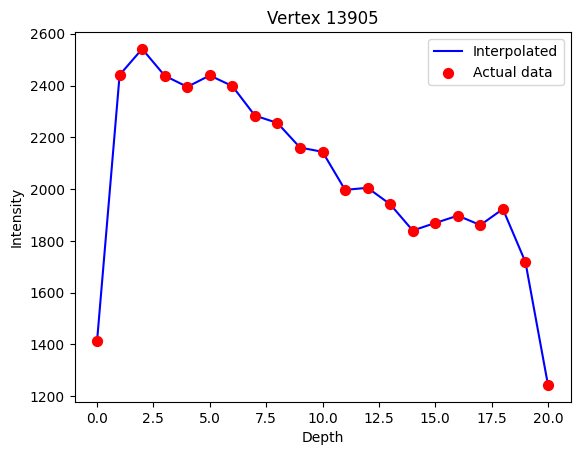

In [ ]:
# Extract profile for vertex 13904
vertex_id = 13905
depths_with_data = []
intensities_with_data = []

for depth_idx in range(41):
    unique_id = encode_unique_id(vertex_id, depth_idx)
    if unique_id in vertex_stats.index:
        depths_with_data.append(depth_idx)
        intensities_with_data.append(vertex_stats.loc[unique_id]['median'])

# Interpolate to fill missing depths
from scipy.interpolate import interp1d

if len(depths_with_data) > 3:  # Need at least a few points
    f = interp1d(depths_with_data, intensities_with_data, kind='linear', fill_value='extrapolate')
    
    # Get full profile (all 21 depths)
    all_depths = np.arange(41)
    full_profile = f(all_depths)
    
    # Plot
    import matplotlib.pyplot as plt
    plt.plot(all_depths, full_profile, 'b-', label='Interpolated')
    plt.scatter(depths_with_data, intensities_with_data, c='r', s=50, label='Actual data', zorder=5)
    plt.xlabel('Depth')
    plt.ylabel('Intensity')
    plt.title(f'Vertex {vertex_id}')
    plt.legend()
    plt.show()

In [17]:
# For vertex 13904 at depth 11 (which got 38 voxels)
unique_id = encode_unique_id(13904, 11)

if unique_id in vertex_stats.index:
    # Get the actual voxel intensities assigned to it
    intensities_assigned = vertex_stats.loc[unique_id]['intensities']
    
    # Find which voxels these are
    # We need to trace back from intensities to voxel indices
    
    # Find voxels assigned to this vertex
    voxels_for_this_vertex = np.where(nearest_vertex_global_idx == unique_id)[0]
    
    print(f"Vertex 13904 at depth 11 has {len(voxels_for_this_vertex)} voxels")
    print(f"Their voxel indices: {voxel_indices[voxels_for_this_vertex][:10]}")  # Show first 10
    
    # Check if these voxels are spatially clustered or spread out
    voxel_coords_for_vertex = voxel_indices[voxels_for_this_vertex]
    
    # Check spatial extent
    print(f"\nSpatial extent of assigned voxels:")
    print(f"  X range: {voxel_coords_for_vertex[:, 0].min()} to {voxel_coords_for_vertex[:, 0].max()}")
    print(f"  Y range: {voxel_coords_for_vertex[:, 1].min()} to {voxel_coords_for_vertex[:, 1].max()}")
    print(f"  Z range: {voxel_coords_for_vertex[:, 2].min()} to {voxel_coords_for_vertex[:, 2].max()}")

Vertex 13904 at depth 11 has 18 voxels
Their voxel indices: [[ 69 135 174]
 [ 69 136 175]
 [ 69 136 176]
 [ 70 136 173]
 [ 70 136 174]
 [ 70 136 175]
 [ 70 137 176]
 [ 71 137 173]
 [ 71 137 174]
 [ 71 137 175]]

Spatial extent of assigned voxels:
  X range: 69 to 73
  Y range: 135 to 138
  Z range: 172 to 176


In [18]:
# Verify the encoding is correct
unique_id = encode_unique_id(13904, 11)
print(f"Encoded unique_id: {unique_id}")

# Check what's at that position in all_vertex_labels
print(f"all_vertex_labels[{unique_id}] = {all_vertex_labels[unique_id]}")

# Should be (13904, 11)

Encoded unique_id: 2756523
all_vertex_labels[2756523] = (13904, 11)


In [19]:
unique_id = encode_unique_id(13904, 11)

# Count how many voxels were assigned to this vertex
voxels_for_this_vertex = np.where(nearest_vertex_global_idx == unique_id)[0]
print(f"Number of voxels assigned: {len(voxels_for_this_vertex)}")

# What does the dataframe say?
print(f"Dataframe count: {vertex_stats.loc[unique_id]['count']}")

# Are these the same?
print(f"Match: {len(voxels_for_this_vertex) == vertex_stats.loc[unique_id]['count']}")

Number of voxels assigned: 18
Dataframe count: 18
Match: True


In [20]:
# Load one surface to check vertex spacing
coords, faces, volume_info = nib.freesurfer.read_geometry('raw_data/freesurfer_surfaces/20_depths/rh.equi0.5.pial', read_metadata=True)

# Find neighbors of vertex 13904 in the mesh
neighbors = []
for face in faces:
    if 13904 in face:
        neighbors.extend([v for v in face if v != 13904])
neighbors = list(set(neighbors))

print(f"Vertex 13904 has {len(neighbors)} neighbors in the mesh")

# Check distances to neighbors
cras = np.array(volume_info['cras'])
vertex_pos = coords[13904] + cras

for n in neighbors[:5]:  # Show first 5
    neighbor_pos = coords[n] + cras
    dist = np.linalg.norm(vertex_pos - neighbor_pos)
    print(f"  Distance to vertex {n}: {dist:.3f} mm")

Vertex 13904 has 6 neighbors in the mesh
  Distance to vertex 14214: 0.618 mm
  Distance to vertex 13192: 0.633 mm
  Distance to vertex 13096: 0.595 mm
  Distance to vertex 13578: 0.553 mm
  Distance to vertex 13193: 0.442 mm


In [ ]:
# Check if vertex 13904 at depth 10 has ANY voxels assigned
unique_id_depth10 = encode_unique_id(13904, 10)
print(f"Vertex 13904 at depth 10 unique_id: {unique_id_depth10}")
print(f"Exists in vertex_stats: {unique_id_depth10 in vertex_stats.index}")

# Check if this vertex coordinate even exists in our all_vertex_coords
if unique_id_depth10 < len(all_vertex_coords):
    vertex_10_ras = all_vertex_coords[unique_id_depth10]
    vertex_11_ras = all_vertex_coords[encode_unique_id(13904, 11)]
    vertex_9_ras = all_vertex_coords[encode_unique_id(13904, 9)]
    
    print(f"\nVertex 13904 at depth 9 RAS: {vertex_9_ras}")
    print(f"Vertex 13904 at depth 10 RAS: {vertex_10_ras}")
    print(f"Vertex 13904 at depth 11 RAS: {vertex_11_ras}")
    
    # Distance between them
    distance10_11 = np.linalg.norm(vertex_11_ras - vertex_10_ras)
    distance9_10 = np.linalg.norm(vertex_10_ras - vertex_9_ras)
    print(f"Distance between depth 9 and 10: {distance9_10:.4f} mm")
    print(f"Distance between depth 10 and 11: {distance10_11:.4f} mm")
    
    # Find voxels near depth 10 vertex
    distances_to_v10 = np.linalg.norm(voxel_ras - vertex_10_ras, axis=1)
    nearby_voxels = np.where(distances_to_v10 < 0.2)[0]  # Within 0.2mm
    
    print(f"\nVoxels within 0.2mm of depth 10 vertex: {len(nearby_voxels)}")
    
    if len(nearby_voxels) > 0:
        # What were these voxels assigned to?
        for v_idx in nearby_voxels[:5]:
            assigned_to = nearest_vertex_global_idx[v_idx]
            v_id, d_idx = all_vertex_labels[assigned_to]
            dist_to_v10 = np.linalg.norm(voxel_ras[v_idx] - vertex_10_ras)
            dist_to_assigned = np.linalg.norm(voxel_ras[v_idx] - all_vertex_coords[assigned_to])
            print(f"  Voxel {voxel_indices[v_idx]}: assigned to vertex {v_id} depth {d_idx}")
            print(f"    Distance to v13904-d10: {dist_to_v10:.4f}, to assigned: {dist_to_assigned:.4f}")

Vertex 13904 at depth 10 unique_id: 2507194
Exists in vertex_stats: True

Vertex 13904 at depth 9 RAS: [ -0.90852404 -45.18989944  14.54970551]
Vertex 13904 at depth 10 RAS: [ -0.86144257 -45.21055985  14.48688078]
Vertex 13904 at depth 11 RAS: [ -0.81645012 -45.2303009   14.42684364]
Distance between depth 9 and 10: 0.0812 mm
Distance between depth 10 and 11: 0.0776 mm

Voxels within 0.2mm of depth 10 vertex: 32
  Voxel [ 70 136 174]: assigned to vertex 13904 depth 11
    Distance to v13904-d10: 0.1721, to assigned: 0.1578
  Voxel [ 70 136 175]: assigned to vertex 13904 depth 11
    Distance to v13904-d10: 0.1781, to assigned: 0.1759
  Voxel [ 70 137 174]: assigned to vertex 13904 depth 12
    Distance to v13904-d10: 0.1752, to assigned: 0.0961
  Voxel [ 70 137 175]: assigned to vertex 13904 depth 12
    Distance to v13904-d10: 0.1811, to assigned: 0.1382
  Voxel [ 71 135 174]: assigned to vertex 13904 depth 9
    Distance to v13904-d10: 0.1620, to assigned: 0.1486
